In [97]:
#Intervals of Visual Stimulus (Film #)
#Read h5 textfile
#Reading h5 textfile
import h5py
import pandas as pd
df = pd.read_hdf()
#Function convert h5 to csv
def H5toCSV(filename,pathname):
    import h5py
    import pandas as pd
    dfh5 = pd.read_hdf(filename)
    dfh5.to_csv(pathname)

In [107]:
H5toCSV('Z:/Cl37-20191117/Video File/Videos/pupil_36.tifDLC_resnet50_Cl37Jan14shuffle1_20000.h5'
       ,'Z:/Cl37-20191117/Video File/Videos/mData/p36.csv')

In [2]:
"""
Total = [820,824,819,819,819,
Cl34_20191113_pupil0 = [141,307]
Cl34_20191113_pupil1 = [675,769,822]
Cl34_20191113_pupil2 = [117,196,389]
Cl34_20191113_pupil3 = [430]
Cl34_20191113_pupil4 = [211,317,459,580]
Cl34_20191113_pupil5 = []
#Claustrum 39
total39 = [820,820]
cl39_p0 = [95,303,660,768]
cl39_p10 = [36,137,222,551,812]
"""

'\nTotal = [820,824,819,819,819,\nCl34_20191113_pupil0 = [141,307]\nCl34_20191113_pupil1 = [675,769,822]\nCl34_20191113_pupil2 = [117,196,389]\nCl34_20191113_pupil3 = [430]\nCl34_20191113_pupil4 = [211,317,459,580]\nCl34_20191113_pupil5 = []\n#Claustrum 39\ntotal39 = [820,820]\ncl39_p0 = [95,303,660,768]\ncl39_p10 = [36,137,222,551,812]\n'

In [3]:
#Claustrum 37, start frame = 1
total = [820,820,820,820,820,820,820,820,820,821]
D1117p0 = [230,585,641,806]
D1117p1 = [184,312,430,504,613,735]
D1117p2 = [41,108,152,234,291,766]
D1117p3 = [215,357,395,450,522,585,668]
D1117p4 = [80,141,374,431,487,702]
D1117p5 = [21,91,193,309,427,549]
D1117p6 = [124,253,360,475,659,773]
D1117p7 = [76,156,207,425,522,700]
D1117p8 = [132,276,438,507,563,607,800]
D1117p9 = [244,374,453,813]

D10 = [
    230,585,641,806,
    820+184,820+312,820+430,820+504,820+613,820+735,
    820*2+41,820*2+108,820*2+152,820*2+234,820*2+291,820*2+766,
    820*3+215,820*3+357,820*3+395,820*3+450,820*3+522,820*3+585,820*3+668,
    820*4+80,820*4+141,820*4+374,820*4+431,820*4+487,820*4+702,
    820*5+21,820*5+91,820*5+193,820*5+309,820*5+427,820*5+549,
    820*6+124,820*6+253,820*6+360,820*6+475,820*6+659,820*6+773,
    820*7+76,820*7+156,820*7+207,820*7+425,820*7+522,820*7+700,
    820*8+132,820*8+276,820*8+438,820*8+507,820*8+563,820*8+607,820*8+800,
    820*9+244,820*9+374,820*9+453,820*9+813
]

In [4]:
#read visualstimstarts
import csv
import numpy as np
VisualStimStarts = []
with open('Z:/Cl37-20191117/Video File/Videos/VisualStimStarts.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in readCSV:
        VisualStimStarts.append(row)
VisualStimStarts = VisualStimStarts[0]
VSS = VisualStimStarts[0:len(D10)]
numVSS = [float(x) for x in VSS]
#Find frame interval and stimTime interval to align the first flash in film to the number of flash in stimTime
intframe = []
for i in range(1,len(D10)):
    intframe.append(D10[i]-D10[i-1])
inttime = []
for i in range(1,len(numVSS)):
    inttime.append(numVSS[i]-numVSS[i-1])
newpVss = VisualStimStarts

In [5]:
numnewpVss = [float(x) for x in newpVss]

In [6]:
D10time = [x/10 for x in D10]
ApVss=[x-(numnewpVss[0]-D10time[0]) for x in numnewpVss]

Text(0, 0.5, 'Difference of Time (s)')

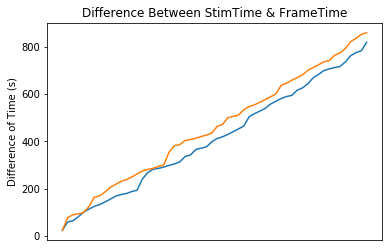

In [24]:
import matplotlib.pyplot as plt
plt.plot(D10time)
plt.plot(ApVss[0:58])
plt.title('Difference Between StimTime & FrameTime')
plt.xticks([])
plt.ylabel('Difference of Time (s)')

In [8]:
dif = (np.subtract(D10time,ApVss))
plt.plot(dif)

ValueError: operands could not be broadcast together with shapes (58,) (234,) 

In [9]:
dif

NameError: name 'dif' is not defined

In [10]:
import numpy as np
#read TrialStartTimes
TrialStartTimes = []
with open('Z:/Cl37-20191117/TrialStartTimes.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in readCSV:
        TrialStartTimes.append(row)
TrialStartTimes = TrialStartTimes[0] #if the original file has only 1 row
#read VisualStimStarts
VisualStimStarts = []
with open('Z:/Cl37-20191117/Video File/Videos/VisualStimStarts.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in readCSV:
        VisualStimStarts.append(row)
VisualStimStarts = VisualStimStarts[0]

In [11]:
numVSS = [float(x) for x in VisualStimStarts]
numTST = [float(x) for x in TrialStartTimes]

In [12]:
Dif = []
recentVSS = []
for i in range(0,len(numTST)):
    for j in range(0,len(numVSS)):
        diff = numTST[i] - numVSS[j]
        Dif.append(abs(diff))
    recentVSS.append(Dif.index(min(Dif)))
    Dif = []

In [13]:
Dframe = D1117p0 + [820+x for x in D1117p1] + [820*2+x for x in D1117p2] + [3*820+x for x in D1117p3] + [4*820+x for x in D1117p4] + [5*820+x for x in D1117p5] + [6*820+x for x in D1117p6] + [7*820+x for x in D1117p7] + [8*820+x for x in D1117p8] + [9*820+x for x in D1117p9]
len(Dframe)

58

In [14]:
usenumVss = numVSS[5:63]

In [15]:
#read + concat csv dataFile from dlc
import os
import glob
import pandas as pd
os.chdir('Z:/Cl37-20191117/Video File/Videos/mData')
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
dlcFile = pd.concat([pd.read_csv(f) for f in all_filenames])

In [16]:
type(dlcFile)

pandas.core.frame.DataFrame

In [17]:
list(dlcFile)

['scorer',
 'DLC_resnet50_Cl37Jan14shuffle1_20000',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.1',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.2',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.3',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.4',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.5',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.6',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.7',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.8',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.9',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.10',
 'DLC_resnet50_Cl37Jan14shuffle1_20000.11']

In [18]:
dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000']

0              bodypart1
1                      x
2       596.856201171875
3      597.6655883789062
4      599.0593872070312
5       604.916259765625
6      609.5347900390625
7      611.1380004882812
8      603.2716064453125
9      602.4415283203125
10     601.5223388671875
11     605.3192138671875
12     601.5578002929688
13     608.1402587890625
14     595.7665405273438
15     595.8226318359375
16         593.623046875
17     594.9970092773438
18     594.5891723632812
19     594.1934204101562
20       592.21337890625
21      590.642822265625
22      589.902587890625
23     591.1229858398438
24     591.2078857421875
25     593.8903198242188
26     593.6596069335938
27        592.8935546875
28     592.8214111328125
29     592.6026000976562
             ...        
793    595.5899658203125
794    597.0162963867188
795     590.804443359375
796     590.788330078125
797     591.124755859375
798    598.0350341796875
799    596.4627685546875
800    595.7515258789062
801    595.7182006835938


In [ ]:
'''
1. instruction for selecting the right VSS frame alignment
2. remove headerlines of dlcFile
3. locally align dlcFile and STS for 10 videos
'''

In [25]:
#check # of trials
import numpy as np
#read TrialStartTimes
TrialStartTimes = []
with open('Z:/Cl37-20191117/TrialStartTimes.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in readCSV:
        TrialStartTimes.append(row)
TrialStartTimes = TrialStartTimes[0] #if the original file has only 1 row

In [28]:
len(TrialStartTimes)-1

461

In [29]:
import pickle
from pathlib import Path
data_folder = Path('C:/Users/Brown Lab/Desktop/Analysis working folder/Claustrum explore')
file_to_open = data_folder / "mouse_log_37.pkl"
with open(file_to_open, 'rb') as f:
   master_log_37 = pickle.load(f, encoding='latin1')

In [45]:
np.unique(master_log_37[master_log_37.date=='20191117'].trial_num)

array([array([[array([[7]], dtype=uint8)]], dtype=object),
       array([[array([[8]], dtype=uint8)]], dtype=object),
       array([[array([[9]], dtype=uint8)]], dtype=object),
       array([[array([[10]], dtype=uint8)]], dtype=object),
       array([[array([[11]], dtype=uint8)]], dtype=object),
       array([[array([[12]], dtype=uint8)]], dtype=object),
       array([[array([[13]], dtype=uint8)]], dtype=object),
       array([[array([[14]], dtype=uint8)]], dtype=object),
       array([[array([[15]], dtype=uint8)]], dtype=object),
       array([[array([[16]], dtype=uint8)]], dtype=object),
       array([[array([[17]], dtype=uint8)]], dtype=object),
       array([[array([[18]], dtype=uint8)]], dtype=object),
       array([[array([[19]], dtype=uint8)]], dtype=object),
       array([[array([[20]], dtype=uint8)]], dtype=object),
       array([[array([[21]], dtype=uint8)]], dtype=object),
       array([[array([[22]], dtype=uint8)]], dtype=object),
       array([[array([[23]], dtype=uint8)]]

In [44]:
461-427

34

In [ ]:
#pupil test stuff
#read h5
import h5py
import pandas as pd
#df = pd.read_hdf()
#function convert h5 to csv
#(unnecessary if select save_as_csv=True in analyze_video function)
def H5toCSV(filename,pathname):
    import h5py
    import pandas as pd
    dfh5 = pd.read_hdf(filename)
    dfh5.to_csv(pathname)

#claustrum37 date1117 data (require manual input)
total = [820,820,820,820,820,820,820,820,820,821]
D1117p0 = [230,585,641,806]
D1117p1 = [184,312,430,504,613,735]
D1117p2 = [41,108,152,234,291,766]
D1117p3 = [215,357,395,450,522,585,668]
D1117p4 = [80,141,374,431,487,702]
D1117p5 = [21,91,193,309,427,549]
D1117p6 = [124,253,360,475,659,773]
D1117p7 = [76,156,207,425,522,700]
D1117p8 = [132,276,438,507,563,607,800]
D1117p9 = [244,374,453,813]
Dframe = D1117p0 + [820+x for x in D1117p1] + [820*2+x for x in D1117p2] + [3*820+x for x in D1117p3] + [4*820+x for x in D1117p4] + [5*820+x for x in D1117p5] + [6*820+x for x in D1117p6] + [7*820+x for x in D1117p7] + [8*820+x for x in D1117p8] + [9*820+x for x in D1117p9]


#read visualstimstarts
import csv
import numpy as np
VisualStimStarts = []
with open('Z:/Cl37-20191117/Video File/Videos/VisualStimStarts.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in readCSV:
        VisualStimStarts.append(row)
if len(VisualStimStarts)==1:
    VisualStimStarts = VisualStimStarts[0]
VSS = [float(x) for x in VisualStimStarts]
#find frame interval and stimTime interval to align the first flash
DframeTime = [x/10 for x in Dframe]
intframe = []
for i in range(1,len(DframeTime)):
    intframe.append(DframeTime[i]-DframeTime[i-1])
inttime = []
for i in range(1,len(VSS)):
    inttime.append(VSS[i]-VSS[i-1])
'''
Find the first number x in inttime that is similar to the first number in intframe
The new VisualStimStarts starts from the index of x 
'''
useVSS = VSS[5:(5+len(Dframe))]


#read + concat csv dataFil from dlc
import os
import glob
import pandas as pd
os.chdir('Z:/Cl37-20191117/Video File/Videos/mData')
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
dlcFile = pd.concat([pd.read_csv(f) for f in all_filenames])
#read TrialStartTimes
TrialStartTimes = []
with open('Z:/Cl37-20191117/TrialStartTimes.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in readCSV:
        TrialStartTimes.append(row)
if len(TrialStartTimes)==1:
    TrialStartTimes = TrialStartTimes[0]
TST = [float(x) for x in TrialStartTimes]
#create list of most recentVSSind for each trial using aligned VSS
Dif = []
recentVSSind = []
for i in range(0,len(TST)):
    for j in range(0,len(useVSS)):
        diff = TST[i] - useVSS[j]
        Dif.append(abs(diff))
    recentVSSind.append(Dif.index(min(Dif)))
    Dif = []

    


In [ ]:
recentVSS = [useVSS[i] for i in recentVSSind]
recentFrame = [Dframe[i] for i in recentVSSind[0:58]]
recentFrameTime = [x/10 for x in recentFrame]
useTST = TST[0:58]
np.subtract(TST, recentVSS)
np.subtract(recentFrameTime,recentVSS[0:58])
import numpy as np
np.subtract(useTST,recentFrameTime)
overallDif = np.subtract(recentVSS[0:58],recentFrameTime)+np.subtract(useTST,recentVSS[0:58])
overallDif
rFTalign = [x-(recentFrameTime[0]-recentVSS[0]) for x in recentFrameTime]
np.subtract(useTST, rFTalign)
difA = np.subtract(useTST,recentFrameTime)
TSTtime= np.add(recentFrameTime,difA)
TSTframe = [x*10 for x in TSTtime]

#read + concat csv dataFil from dlc
import os
import glob
import pandas as pd
os.chdir('Z:/Cl37-20191117/Video File/Videos/mData')
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
dlcFile = pd.concat([pd.read_csv(f) for f in all_filenames], ignore_index=True)
#convert usable data in pupil data from string to float
for i in dlcFile.index:
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.1'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.1'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.2'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.2'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.5'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.5'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.6'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.6'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.7'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.7'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.8'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.8'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][i])
    dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.11'][i]=float(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.11'][i])
    
bpindex = list((dlcFile[dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000']=='bodypart1']).index)
coorindex = list((dlcFile[dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000']=='x']).index)
dropindex = bpindex+coorindex
dlcFile = dlcFile.drop(dropindex)
TSTframeI = [int(x) for x in TSTframe]
#collect data of pupil changes aligned to trials
data = []
trialdata = []
for i in range(1,len(TSTframeI)):
    for j in range(TSTframeI[i-1]+1,TSTframeI[i]+2):
        if j in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j])))
        elif (j-1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j-1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j-1])))
        elif (j+1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j+1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j+1])))
    trialdata.append(data)
    data = []

#plot trial-by-trial pupil diameter/frame
import matplotlib.pyplot as plt
for i in range(0, len(trialdata)):
    plt.figure()
    plt.plot(trialdata[i])
    plt.xlabel('# of Frames')
    plt.ylabel('Pupil Diameter')
    plt.title('Single Trial Pupil Diameter vs Frame #')
    plt.show()

data1 = []

for i in range(1,len(TSTframeI)):
    for j in range(TSTframeI[i-1]+1,TSTframeI[i]+2):
        if j in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j])))
        elif (j-1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j-1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j-1])))
        elif (j+1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j+1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j+1])))

#plot collective pupil diameter/frame (multiple trials linearly combined)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data)
plt.xlabel('# of Frames')
plt.ylabel('Pupil Diameter')
plt.title('Collective Pupil Diameter vs Frame #')
plt.show()
import pickle
from pathlib import Path
data_folder = Path('C:/Users/Brown Lab/Desktop/Analysis working folder/Claustrum explore')
file_to_open = data_folder / "mouse_log_37.pkl"
with open(file_to_open, 'rb') as f:
   master_log_37 = pickle.load(f, encoding='latin1')

uniqueTN=np.unique(master_log_37[master_log_37.date=='20191117'].trial_num)
TNind = []
for i in range(0,len(uniqueTN)):
    TNind.append(uniqueTN[i][0][0][0][0])
processTST = []
for i in range(0,len(TrialStartTimes)):
    for j in range(0,len(TNind)):
        if i == int(TNind[j])-1:
            processTST.append(TrialStartTimes[i])

pTSTi = [int(float(x)*10) for x in processTST]
#collect data of pupil changes aligned to nondrop trials
data = []
trialdata = []
for i in range(1,len(pTSTi)):
    for j in range(pTSTi[i-1]+1,pTSTi[i]+2):
        if j in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j])))
        elif (j-1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j-1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j-1])))
        elif (j+1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j+1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j+1])))
    trialdata.append(data)
    data = []
import matplotlib.pyplot as plt
for i in range(0, len(trialdata)):
    plt.figure()
    plt.plot(trialdata[i])
    plt.xlabel('# of Frames')
    plt.ylabel('Pupil Diameter')
    plt.title('Single Trial Pupil Diameter vs Frame #')
    plt.show()

In [ ]:
TSTframeI = [int(x) for x in TSTframe]
#collect data of pupil changes aligned to trials
data = []
trialdata = []
for i in range(1,len(TSTframeI)):
    for j in range(TSTframeI[i-1]+1,TSTframeI[i]+2):
        if j in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j])))
        elif (j-1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j-1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j-1])))
        elif (j+1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j+1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j+1])))
    trialdata.append(data)
    data = []

#plot trial-by-trial pupil diameter/frame
import matplotlib.pyplot as plt
for i in range(0, len(trialdata)):
    plt.figure()
    plt.plot(trialdata[i])
    plt.xlabel('# of Frames')
    plt.ylabel('Pupil Diameter')
    plt.title('Single Trial Pupil Diameter vs Frame #')
    plt.show()

data1 = []

for i in range(1,len(TSTframeI)):
    for j in range(TSTframeI[i-1]+1,TSTframeI[i]+2):
        if j in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j])))
        elif (j-1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j-1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j-1])))
        elif (j+1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j+1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j+1])))

#plot collective pupil diameter/frame (multiple trials linearly combined)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data)
plt.xlabel('# of Frames')
plt.ylabel('Pupil Diameter')
plt.title('Collective Pupil Diameter vs Frame #')
plt.show()
import pickle
from pathlib import Path
data_folder = Path('C:/Users/Brown Lab/Desktop/Analysis working folder/Claustrum explore')
file_to_open = data_folder / "mouse_log_37.pkl"
with open(file_to_open, 'rb') as f:
   master_log_37 = pickle.load(f, encoding='latin1')

uniqueTN=np.unique(master_log_37[master_log_37.date=='20191117'].trial_num)
TNind = []
for i in range(0,len(uniqueTN)):
    TNind.append(uniqueTN[i][0][0][0][0])
processTST = []
for i in range(0,len(TrialStartTimes)):
    for j in range(0,len(TNind)):
        if i == int(TNind[j])-1:
            processTST.append(TrialStartTimes[i])

pTSTi = [int(float(x)*10) for x in processTST]
#collect data of pupil changes aligned to nondrop trials
data = []
trialdata = []
for i in range(1,len(pTSTi)):
    for j in range(pTSTi[i-1]+1,pTSTi[i]+2):
        if j in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j])))
        elif (j-1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j-1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j-1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j-1])))
        elif (j+1) in list(dlcFile.index):
            data.append(np.sqrt(np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.3'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.9'][j+1])+np.square(dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.4'][j+1]-dlcFile['DLC_resnet50_Cl37Jan14shuffle1_20000.10'][j+1])))
    trialdata.append(data)
    data = []
import matplotlib.pyplot as plt
for i in range(0, len(trialdata)):
    plt.figure()
    plt.plot(trialdata[i])
    plt.xlabel('# of Frames')
    plt.ylabel('Pupil Diameter')
    plt.title('Single Trial Pupil Diameter vs Frame #')
    plt.show()